<a href="https://colab.research.google.com/github/coyens/Python/blob/master/Google_geocoder_ver.%201.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Geocodowanie API Google Maps

## Wstęp

1. Należy załadować plik z danymi.

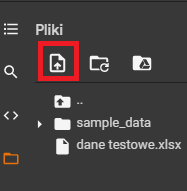


2. wymagane nazwy kolumn w pliku źródłowym:
- współrzędne

  image.png

- dane adresowe

   image.png

- bądź adres robity w ten sposób:

  image.png


3. Należy wypełnić pola 'api_key' oraz nazwę pliku.
4. W sekcji "Walidacja nazw kolumn" możesz sprawdzić poprawność pliku źródłowego.
5. Poruszaj się po pliku do potrzebnych sekcji z pomocą spisu treści 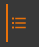
--------------------------------------------------------------------------
### Ładowanie komórki z kodem odbywa się za pomocą 'ctr + Enter'

                                                                                                                           @autor: Kasia Górska

## Przygotowanie wtyczek i załadowanie danych

In [ ]:
import pandas as pd 
import requests
from datetime import date
from tqdm import tqdm
import time


today = date.today()
dzisiaj = today.strftime("%Y-%m-%d")

# Google Maps
base = "https://maps.googleapis.com/maps/api/geocode/json?"
sensor = 'true'

# Do wypełnienia
api_key = '<TUTAJ WPISZ API KEY>'

# Do wypełnienia
link = "dane testowe.xlsx"
data = pd.read_excel(link) 


data = data.head(1)

data

,id,max_no_cluster,count_cluster,cluster,centroid_lng,centroid_lat,fake_hdm_system_id_flag,economic_entity_id_1,hdm_system_id,flag_source,distribution_point_type,distribution_point_type_text,item_status,province,city,postal_code,street_prefix,street_name,street_number,apartment_number,pos_latitude,pos_longitude,geo_pos_id,pos_quality,pos_institution_latitude,pos_institution_longitude,correct_lat,correct_lng,full_adress,here_lat,here_long
0,76,18,18,1,20.63471,52.884192,0,76,144775,Rekord z bazy aptecznej i medyczej,6,Apteka Szpitalna Zamknięta,1,7,Ciechanów,06-413,ul.,Powstańców Wielkopolskich,2,NaN,52.882007,20.633423,POINT(20.6334225 52.88200653),0,52.882007,20.633423,52.883561,20.6346,"Powstańców Wielkopolskich 2, 06-413, Ciechanów",52.88369,20.63485


### Walidacja nazw kolumn
Jeśli walidacja zwróci komuniak "BRAK NAZWY" Należy przejść do odpowiedniej zakładki w sekcji "Przygotowanie nazw kolumn: " i dostosować ustawienia lub zmienić nazwy ręcznie i ponownie załadować plik.

In [ ]:
wymagane_nazwy_kolumn =['lat','long','address','city','postal_code',  'street_name', 'street_number']
nazwy_kolumn = list(data.columns.values) 
nazwy_kolumn


for item in wymagane_nazwy_kolumn:
    if item in nazwy_kolumn:
        print ("nazwa %s: OK" % item)
    else:
        print('BRAK NAZWY: %s - przejdź do komórki: Przygotowanie nazw kolumn' % item)


BRAK NAZWY: lat - przejdź do komórki: Przygotowanie nazw kolumn
BRAK NAZWY: long - przejdź do komórki: Przygotowanie nazw kolumn
BRAK NAZWY: address - przejdź do komórki: Przygotowanie nazw kolumn
nazwa city: OK
nazwa postal_code: OK
nazwa street_name: OK
nazwa street_number: OK


## Przygotowanie nazw kolumn:




### Łączenie kolumny adresowej
Do geocodingu z użyciem adresów należy połączyć dane adresowe w jedną kolumne (Ulica + Kod pocztowy + Miasto)

In [ ]:
#Jeśli dane adresowe są w osobnych kolumnach, należy je teraz złączyć
	
data['address'] =  data['street_name']+" "+ data['street_number']+", "+ data['postal_code']+", "+ data['city']

data.head(1)

,id,max_no_cluster,count_cluster,cluster,centroid_lng,centroid_lat,fake_hdm_system_id_flag,economic_entity_id_1,hdm_system_id,flag_source,distribution_point_type,distribution_point_type_text,item_status,province,city,postal_code,street_prefix,street_name,street_number,apartment_number,pos_latitude,pos_longitude,geo_pos_id,pos_quality,pos_institution_latitude,pos_institution_longitude,correct_lat,correct_lng,full_adress,here_lat,here_long,address
0,76,18,18,1,20.63471,52.884192,0,76,144775,Rekord z bazy aptecznej i medyczej,6,Apteka Szpitalna Zamknięta,1,7,Ciechanów,06-413,ul.,Powstańców Wielkopolskich,2,NaN,52.882007,20.633423,POINT(20.6334225 52.88200653),0,52.882007,20.633423,52.883561,20.6346,"Powstańców Wielkopolskich 2, 06-413, Ciechanów",52.88369,20.63485,"Powstańców Wielkopolskich 2, 06-413, Ciechanów"


### Zmiana nazwy kolumn ze współrzędnymi

In [ ]:
# Jeżeli nazwa kolumny się nie zgadza,  mozna tutaj dokonac zmian:
# Wypełnij poniżej nazwę kolumny z źródłowego arkusza

# np. kolumna_lat = "lattitude"
kolumna_lat = "here_lat"	
kolumna_long = "here_long"

data = data.rename(columns={kolumna_lat: 'lat', kolumna_long: 'long'})

data.head(1)

,id,max_no_cluster,count_cluster,cluster,centroid_lng,centroid_lat,fake_hdm_system_id_flag,economic_entity_id_1,hdm_system_id,flag_source,distribution_point_type,distribution_point_type_text,item_status,province,city,postal_code,street_prefix,street_name,street_number,apartment_number,pos_latitude,pos_longitude,geo_pos_id,pos_quality,pos_institution_latitude,pos_institution_longitude,correct_lat,correct_lng,full_adress,lat,long,address
0,76,18,18,1,20.63471,52.884192,0,76,144775,Rekord z bazy aptecznej i medyczej,6,Apteka Szpitalna Zamknięta,1,7,Ciechanów,06-413,ul.,Powstańców Wielkopolskich,2,NaN,52.882007,20.633423,POINT(20.6334225 52.88200653),0,52.882007,20.633423,52.883561,20.6346,"Powstańców Wielkopolskich 2, 06-413, Ciechanów",52.88369,20.63485,"Powstańców Wielkopolskich 2, 06-413, Ciechanów"



###Zmiana nazwy kolumny adresowej


In [ ]:
# Jeżeli nazwa kolumny się nie zgadza,  mozna tutaj dokonac zmian:
# Wypełnij poniżej nazwę kolumny z źródłowego arkusza

# np. kolumna_adres = "Adres"
kolumna_adres = "full_adress"

data = data.rename(columns={kolumna_adres: 'address'})
data.head(1)

,id,max_no_cluster,count_cluster,cluster,centroid_lng,centroid_lat,fake_hdm_system_id_flag,economic_entity_id_1,hdm_system_id,flag_source,distribution_point_type,distribution_point_type_text,item_status,province,city,postal_code,street_prefix,street_name,street_number,apartment_number,pos_latitude,pos_longitude,geo_pos_id,pos_quality,pos_institution_latitude,pos_institution_longitude,correct_lat,correct_lng,address,lat,long
0,76,18,18,1,20.63471,52.884192,0,76,144775,Rekord z bazy aptecznej i medyczej,6,Apteka Szpitalna Zamknięta,1,7,Ciechanów,06-413,ul.,Powstańców Wielkopolskich,2,NaN,52.882007,20.633423,POINT(20.6334225 52.88200653),0,52.882007,20.633423,52.883561,20.6346,"Powstańców Wielkopolskich 2, 06-413, Ciechanów",52.88369,20.63485


#Geocoding

## Reverse geocoding - wyszukiwanie adresu na podstawie współrzędnych


In [ ]:


for i in data.index: 
    latitude = data['lat'][i]
    longitude = data['long'][i]
    list_response =[]
    list_formatted_address =[]
    list_roof =[]
    list_lat =[]
    list_lng =[]
    params = "latlng={lat},{lon}&sensor={sen}&key={key}".format(
        lat=latitude,
        lon=longitude,
        sen=sensor,
        key=api_key)
    url = "{base}{params}".format(base=base, params=params)
    dataj = r.json() 
    response = requests.get(url).json()
    list_response.append(response)
    formated_address = response['results'][0]['formatted_address']
    list_formatted_address.append(formated_address)
    r_roof = response['results'][0]['geometry']['location_type']
    list_roof.append(r_roof)
    r_lat  = response['results'][0]['geometry']['location']["lat"]
    list_lat.append(r_lat)
    r_lng = response['results'][0]['geometry']['location']["lng"]
    list_lng.append(r_lng)
print("Geokoding poszedł pomyślnie, liczba uzyskanych rekordów " + str(len(list_formatted_address)))



Geokoding poszedł pomyślnie, liczba uzyskanych rekordów 1


### Utworzenie pliku z pobranymi adresami

In [ ]:
list_formatted_address = pd.DataFrame(list_formatted_address)
list_lat = pd.DataFrame(list_lat)
list_lng = pd.DataFrame(list_lng)
list_roof = pd.DataFrame(list_roof)


result = pd.concat([list_formatted_address, list_lat, list_lng,list_roof], axis=1)

result.columns = ['formatted_address_google_maps', 'lat_google_maps', 'lng_google_maps', 'location_type_google_maps']
result

#Tutaj możesz zmienić nazwę pliku
nazwa_pliku_gc = "Geocoding adresów Google Maps "

ilosc_do_importu = str(result["formatted_address_google_maps"].count())

result.to_excel(nazwa_pliku_gc + ' (' + ilosc_do_importu + ') '+ dzisiaj  +  '.xlsx', index = False)

### Łączenie pliku źródłowego z wynikami geolokalizatora

In [ ]:
# łączenie geocodingu Googla z plikiem źródłowym

comparison =  pd.concat([data, result], axis=1)

# Tutaj możesz zmienić nazwę pliku
nazwa_pliku_gc_all = 'Źródłowy plik Google Maps geokoding adresów '


result.to_excel(nazwa_pliku_gc_all + ' ('+ ilosc_do_importu + ') ' + dzisiaj +  '.xlsx', index = False)
comparison.head()

,id,max_no_cluster,count_cluster,cluster,centroid_lng,centroid_lat,fake_hdm_system_id_flag,economic_entity_id_1,hdm_system_id,flag_source,distribution_point_type,distribution_point_type_text,item_status,province,city,postal_code,street_prefix,street_name,street_number,apartment_number,pos_latitude,pos_longitude,geo_pos_id,pos_quality,pos_institution_latitude,pos_institution_longitude,correct_lat,correct_lng,full_adress,lat,long,address,formatted_address_google_maps,lat_google_maps,lng_google_maps,location_type_google_maps
0,76,18,18,1,20.63471,52.884192,0,76,144775,Rekord z bazy aptecznej i medyczej,6,Apteka Szpitalna Zamknięta,1,7,Ciechanów,06-413,ul.,Powstańców Wielkopolskich,2,NaN,52.882007,20.633423,POINT(20.6334225 52.88200653),0,52.882007,20.633423,52.883561,20.6346,"Powstańców Wielkopolskich 2, 06-413, Ciechanów",52.88369,20.63485,"Powstańców Wielkopolskich 2, 06-413, Ciechanów","Powstańców Wielkopolskich 2, 06-400 Ciechanów,...",52.883691,20.634853,ROOFTOP


## Geokoding - wyszukiwanie współrzędnych na podstawie adresu

In [ ]:
for i in data.index: 
    address = data['address'][i]
    list_lat =[]
    list_lng =[]
    list_address =[]
    list_roof =[]
    list_type =[]
    params = "address={address}&sensor={sen}&key={key}".format( 
        address =address,
        sen=sensor,
        key=api_key)
    url = "{base}{params}".format(base=base, params=params)
    r = requests.get(url = url, params = params) 
    dataj = r.json() 
    response = requests.get(url).json()
    r_lat  = response['results'][0]['geometry']['location']["lat"]
    list_lat.append(r_lat)
    r_lng = response['results'][0]['geometry']['location']["lng"]
    list_lng.append(r_lng)
    r_address = response['results'][0]['formatted_address']
    list_address.append(r_address)
    r_roof = response['results'][0]['geometry']['location_type']
    list_roof.append(r_roof)
    r_type = response['results'][0]['types'][0]
    list_type.append(r_type)
print("Geokoding poszedł pomyślnie, liczba uzyskanych rekordów " + str(len(list_lat)))

Geokoding poszedł pomyślnie, liczba uzyskanych rekordów 1


### Utworzenie pliku z pobranymi danymi lokalizacji

In [ ]:
list_lat = pd.DataFrame(list_lat)
list_lng = pd.DataFrame(list_lng)
list_address= pd.DataFrame(list_address)
list_roof = pd.DataFrame(list_roof)
list_type = pd.DataFrame(list_type)

result = pd.concat([list_address, list_lat,list_lng,list_roof], axis=1)

result.columns = ['formatted_address', 'lat', 'lng', 'location_type']
result

# Tutaj można nadać nazwę
nazwa_pliku_rgc = 'Google Maps geokoding współrzędnych '

ilosc_do_importu = str(result["formatted_address"].count())

result.to_excel(nazwa_pliku_rgc + ' (' + ilosc_do_importu + ') '+ dzisiaj  +  '.xlsx', index = False)

### Łączenie pliku źródłowego z wynikami geolokalizatora

In [ ]:
# łączenie geocodingu Googla z plikiem źródłowym

comparison =  pd.concat([data, result], axis=1)

#Tutaj możesz zmienić nazwę pliku
nazwa_pliku_rgc_all = 'Źródłowy plik Google Maps geokoding współrzędnych  '

result.to_excel(nazwa_pliku_rgc_all + dzisiaj + ' (' + ilosc_do_importu + ')' +  '.xlsx', index = False)
comparison.head()

,id,max_no_cluster,count_cluster,cluster,centroid_lng,centroid_lat,fake_hdm_system_id_flag,economic_entity_id_1,hdm_system_id,flag_source,distribution_point_type,distribution_point_type_text,item_status,province,city,postal_code,street_prefix,street_name,street_number,apartment_number,pos_latitude,pos_longitude,geo_pos_id,pos_quality,pos_institution_latitude,pos_institution_longitude,correct_lat,correct_lng,full_adress,lat,long,address,formatted_address,lat,lng,location_type
0,76,18,18,1,20.63471,52.884192,0,76,144775,Rekord z bazy aptecznej i medyczej,6,Apteka Szpitalna Zamknięta,1,7,Ciechanów,06-413,ul.,Powstańców Wielkopolskich,2,NaN,52.882007,20.633423,POINT(20.6334225 52.88200653),0,52.882007,20.633423,52.883561,20.6346,"Powstańców Wielkopolskich 2, 06-413, Ciechanów",52.88369,20.63485,"Powstańców Wielkopolskich 2, 06-413, Ciechanów","Powstańców Wielkopolskich 2, 06-413 Ciechanów,...",52.883691,20.634853,ROOFTOP
